Cargar ambos conjuntos de datos los Fusionar en función de las columnas relevantes y generamos estadísticos básicos de las variables numericas

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas
import seaborn as sns

#Cargar ambos conjuntos de datos en Python utilizando pandas.
obligaciones = pandas.read_excel("Obligaciones_clientes.xlsx", sheet_name="Obligaciones_clientes")
tasas = pandas.read_excel("tasas_productos.xlsx", sheet_name="Tasas")

#Fusionar ambos conjuntos de datos en función de las columnas relevantes.
datos = pandas.merge(obligaciones,tasas,\
                    left_on=['cod_segm_tasa','cod_subsegm_tasa','cal_interna_tasa'],\
                    right_on=['cod_segmento','cod_subsegmento','calificacion_riesgos'],how="inner")

datos['fecha_desembolso'] = pandas.to_datetime(datos['fecha_desembolso'])

#Tomamos la tasa correspondiente de acuerdo  al tipo de producto
datos['tasa'] = np.where(datos['id_producto'].str[-20:] == 'operacion_especifica', datos['tasa_operacion_especifica'],
              np.where(datos['id_producto'].str[-13:] == 'Cartera Total', datos['tasa_cartera'],
              np.where(datos['id_producto'].str[-7:] == 'leasing', datos['tasa_leasing'],
              np.where(datos['id_producto'].str[-4:] == 'Sufi', datos['tasa_sufi'],
              np.where(datos['id_producto'].str[-9:] == 'factoring', datos['tasa_factoring'],
              np.where(datos['id_producto'].str[-11:] == 'Hipotecario', datos['tasa_hipotecario'],
                       datos['tasa_tarjeta']
                       ))))))

datos['producto'] = np.where(datos['id_producto'].str[-20:] == 'operacion_especifica', 'operacion_especifica',
              np.where(datos['id_producto'].str[-13:] == 'Cartera Total', 'Cartera Total',
              np.where(datos['id_producto'].str[-7:] == 'leasing', 'leasing',
              np.where(datos['id_producto'].str[-4:] == 'Sufi', 'Sufi',
              np.where(datos['id_producto'].str[-9:] == 'factoring', 'factoring',
              np.where(datos['id_producto'].str[-11:] == 'Hipotecario', 'Hipotecario',
                       'Tarjeta de Credito'
                       ))))))
#Filramos las columnas relevantes 
datos = datos[['radicado', 'num_documento', 'cod_segm_tasa', 'cod_subsegm_tasa', 'cal_interna_tasa',
'id_producto', 'tipo_id_producto', 'producto', 'valor_inicial', 'fecha_desembolso', 'plazo',
'cod_periodicidad', 'periodicidad', 'saldo_deuda', 'modalidad', 'tipo_plazo', 'segmento', 
'calificacion_riesgos','tasa']]

# Dimensiones del conjunto de datos
print("Tamaño")
print(datos.shape)
print("----------------------------")

# Tipo de dato del conjunto de datos
print("Tipo de dato")
print(datos.dtypes)
print("----------------------------")

#Valores faltantes en cada columna
print("Valores faltantes")
print(datos.isna().sum())
print("----------------------------")

Tamaño
(2048, 19)
----------------------------
Tipo de dato
radicado                         int64
num_documento                    int64
cod_segm_tasa                    int64
cod_subsegm_tasa                 int64
cal_interna_tasa                object
id_producto                     object
tipo_id_producto                object
producto                        object
valor_inicial                  float64
fecha_desembolso        datetime64[ns]
plazo                          float64
cod_periodicidad                 int64
periodicidad                    object
saldo_deuda                    float64
modalidad                       object
tipo_plazo                      object
segmento                        object
calificacion_riesgos            object
tasa                           float64
dtype: object
----------------------------
Valores faltantes
radicado                0
num_documento           0
cod_segm_tasa           0
cod_subsegm_tasa        0
cal_interna_tasa        0
id_produ

Estadisticos basicos de la base de datos

In [2]:
#Estadisticos basicos de la base de datos
print("Estadisticos basicos")
print(datos[["valor_inicial","plazo","tasa"]].describe())

Estadisticos basicos
       valor_inicial          plazo         tasa
count   2.048000e+03    2042.000000  2048.000000
mean    3.376266e+05     285.585211     0.293082
std     8.310146e+05    9122.230011     0.100798
min     3.453000e+01       0.000000     0.088588
25%     3.705000e+04      12.000000     0.190125
50%     1.131000e+05      36.000000     0.386700
75%     3.043125e+05      48.000000     0.386700
max     1.395000e+07  400000.000000     0.386700


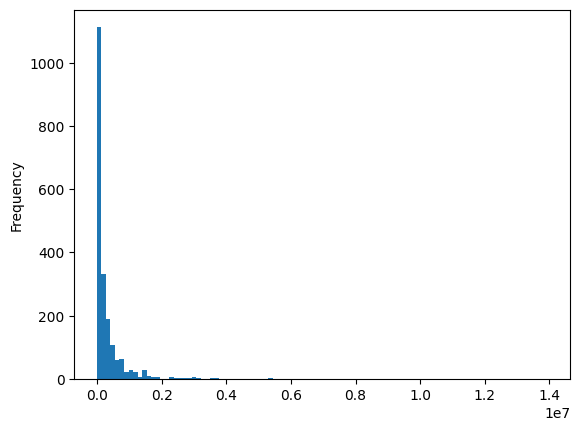

In [3]:
datos.valor_inicial.plot.hist(bins=100)
plot.show()

datos['valor_inicial'].plot(kind='box', title='valor_inicial')
plot.show()

Media: 337,626.6, Mediana: 113,100, Desviación estándar: 831,014.6, el 25% de los datos están por debajo de 37,050, el 75% de los datos están por debajo de 304,312.5. Con una desviación estándar alta en comparación con su media, nos indica que hay un grado de dispersión en los datos y con el histograma y bigotes confirmamos que los datos están concentrados en  valores menores a 2,000,000 y que hay unos valores outliers que nos afectan un poco la dispersión. Los datos estan mayormente concentrados en montos bajos.

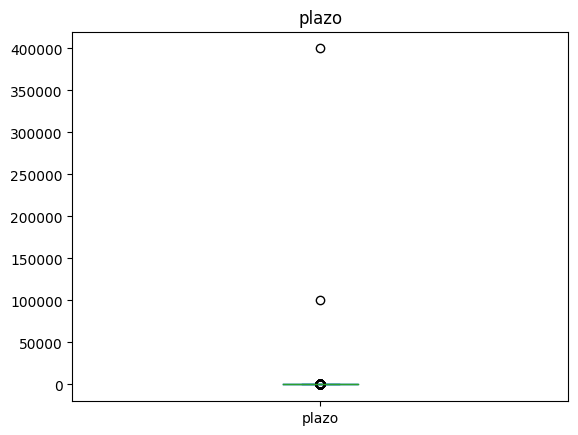

In [4]:
datos.plazo.plot.hist(bins=100)
plot.show()

datos['plazo'].plot(kind='box', title='plazo')
plot.show()

Media: 285.58, Mediana: 36, Desviación estándar: 9,122.23, el 25% de los datos están por debajo de 12, el 75% de los datos están por debajo de 48. Con una desviación estándar tan exageradamente alta en comparación con su media, nos indica un grado muy alto de dispersión en los datos y con el histograma y bigotes confirmamos que hay unos  valores outliers en 100,000 y 400,000 que nos están afectando mucho y que deberíamos limpiar posteriormente

Distribución de las tasas de interés de los diferentes productos financieros en el conjunto de datos

Estadisticos basicos de operacion_especifica
             tasa
count  268.000000
mean     0.214354
std      0.033694
min      0.125405
25%      0.189854
50%      0.219237
75%      0.242262
max      0.266944


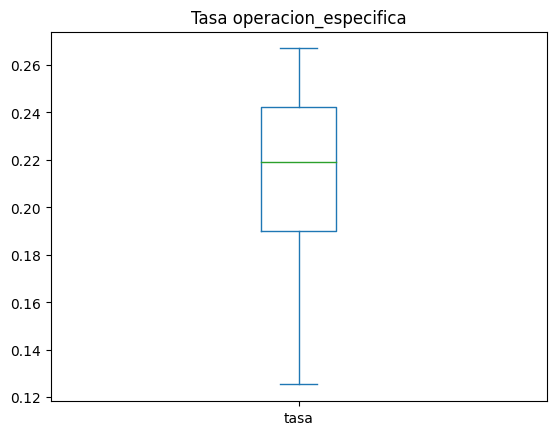

Estadisticos basicos de Cartera Total
             tasa
count  708.000000
mean     0.193825
std      0.050733
min      0.121857
25%      0.160785
50%      0.173005
75%      0.241224
max      0.289897


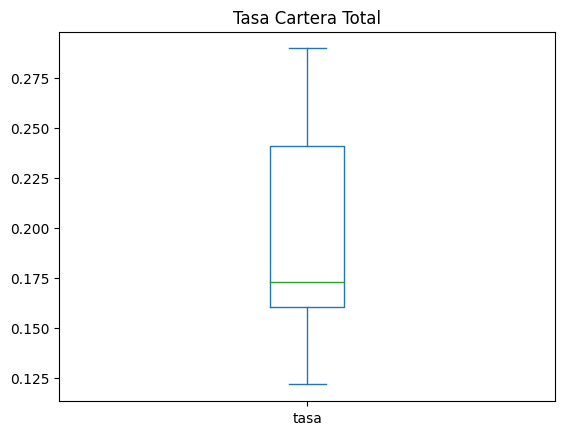

Estadisticos basicos de leasing
            tasa
count  19.000000
mean    0.120876
std     0.015296
min     0.101141
25%     0.113701
50%     0.118268
75%     0.128573
max     0.167353


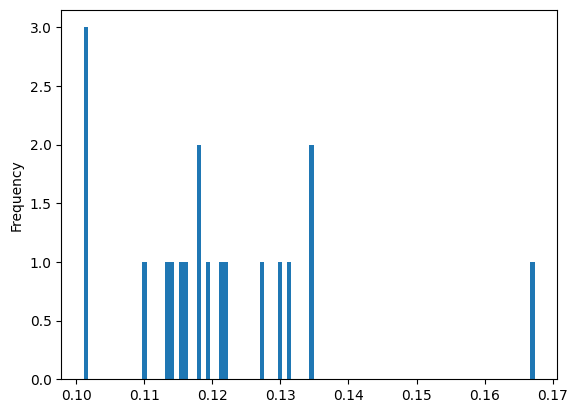

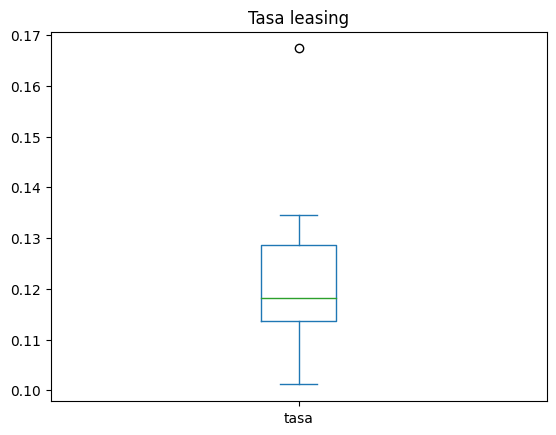

Estadisticos basicos de Sufi
           tasa
count  3.000000
mean   0.088984
std    0.000450
min    0.088588
25%    0.088739
50%    0.088890
75%    0.089181
max    0.089473


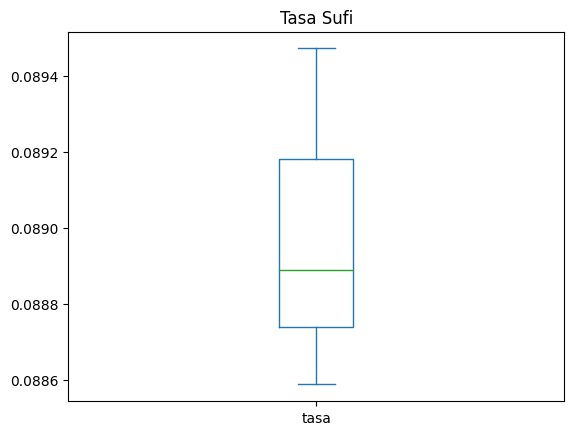

Estadisticos basicos de factoring
           tasa
count  9.000000
mean   0.151048
std    0.011088
min    0.129860
25%    0.142093
50%    0.151336
75%    0.159783
max    0.161573


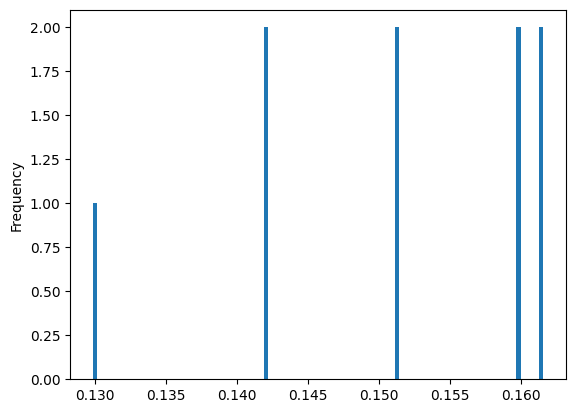

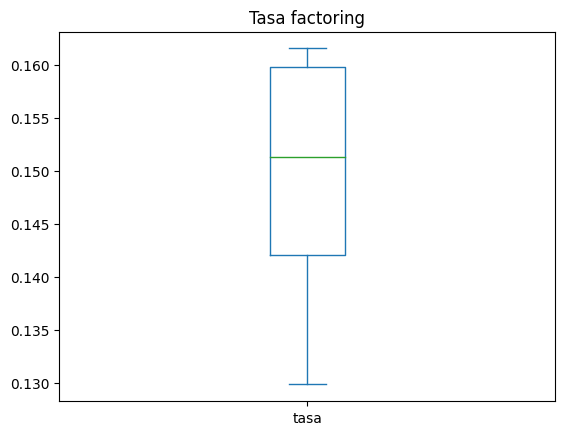

Estadisticos basicos de Hipotecario
           tasa
count  4.000000
mean   0.156264
std    0.007999
min    0.147541
25%    0.150439
50%    0.157230
75%    0.163055
max    0.163055


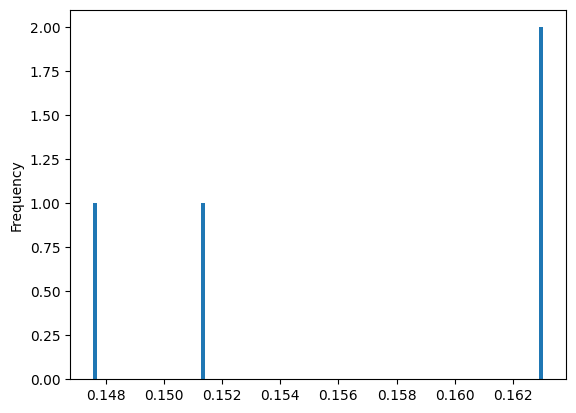

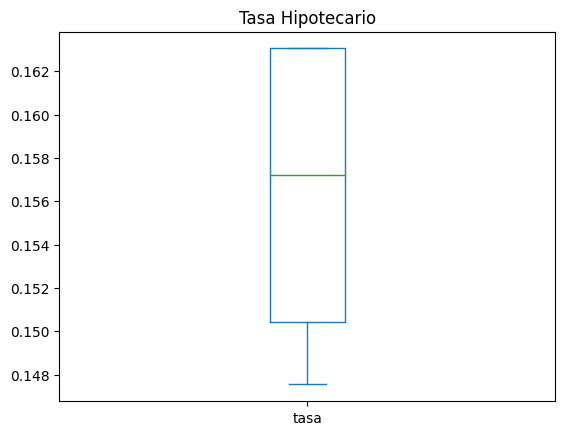

Estadisticos basicos de Tarjeta de Credito
               tasa
count  1.037000e+03
mean   3.867000e-01
std    5.553794e-17
min    3.867000e-01
25%    3.867000e-01
50%    3.867000e-01
75%    3.867000e-01
max    3.867000e-01


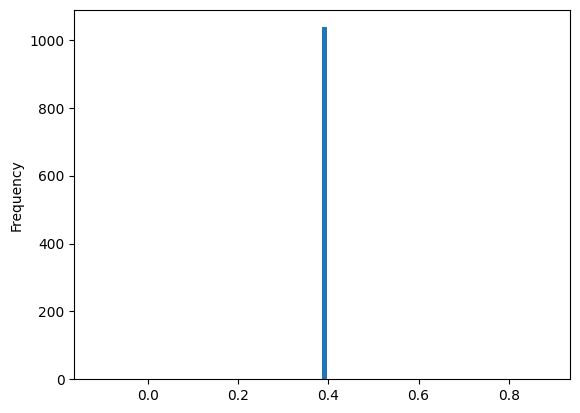

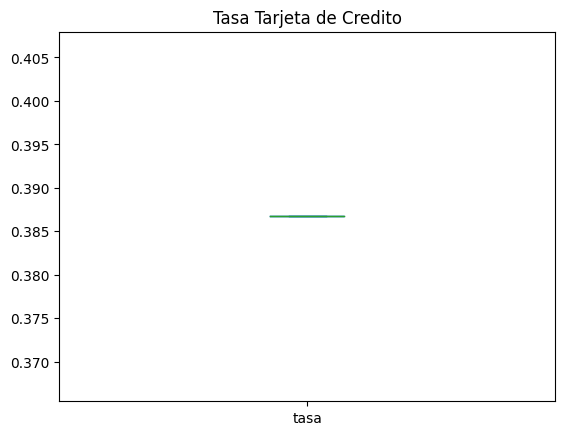

In [5]:
productos = ['operacion_especifica','Cartera Total', 'leasing',\
              'Sufi','factoring', 'Hipotecario','Tarjeta de Credito']
for p in productos:
    print("Estadisticos basicos de " + p)
    aux = datos[datos.producto == p]
    print(aux[["tasa"]].describe())
    aux.tasa.plot.hist(bins=100)
    plot.show()
    aux['tasa'].plot(kind='box', title='Tasa ' + p)
    plot.show()

Los productos Hipotecario, factoring, Sufi y leasing tiene muy pocas observaciones lo que hace difícil tener un entendimiento del comportamiento de las tasas, sin embargo, las tasas tienen poca dispersión para estos productos.
Para el Producto tarjeta de crédito la tasa no tiene variación y tocas se concentran en una tasa de  0.3867.
Para el Producto Cartera Total las tasas varían en el rango 0.121857 y 0.289897 con una desviación estándar de 0.050733 y con un bajo grado de dispersión, especialmente en los dos primeros cuartiles.
Para el operacion_especifica las tasas varían en el rango 0.125405 y 0.266944 con una desviación estándar de 0.033694 y con un bajo grado de dispersión, especialmente en los dos ultimos cuartiles.

¿Cómo ha cambiado la deuda total de los clientes a lo largo del tiempo?

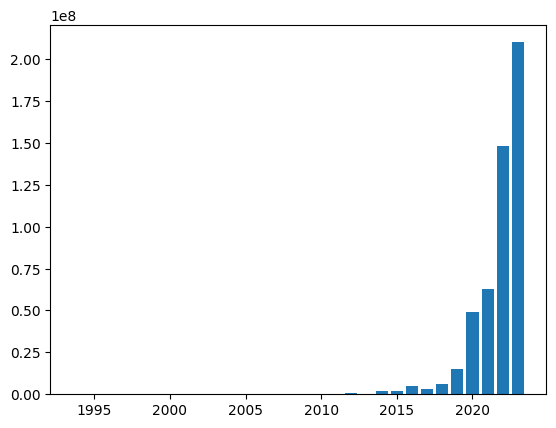

In [6]:
deuda_total = datos.copy()
deuda_total['fecha_desembolso'] = datos.fecha_desembolso.dt.year
deuda_total = deuda_total.sort_values(by=['fecha_desembolso'])
deuda_total = deuda_total.groupby(["fecha_desembolso",],as_index=True, sort=True)\
    .agg(suma=("saldo_deuda","sum"))
plot.bar(deuda_total.index,deuda_total.suma)
plot.show()

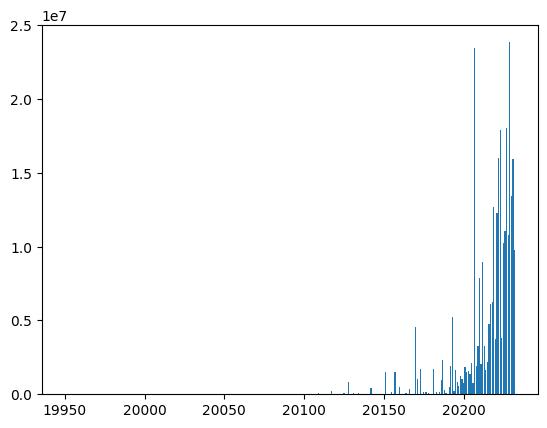

In [160]:
deuda_total = datos[(datos.fecha_desembolso < '2023-01-01')].copy()
deuda_total['fecha_desembolso'] = datos.fecha_desembolso.dt.year*10+datos.fecha_desembolso.dt.month
deuda_total = deuda_total.sort_values(by=['fecha_desembolso'])
deuda_total = deuda_total.groupby(["fecha_desembolso",],as_index=True, sort=True)\
    .agg(suma=("saldo_deuda","sum"))
plot.bar(deuda_total.index,deuda_total.suma)
plot.show()

La  deuda total de los clientes a nivel de año va disminuyendo a medida que pasa el tiempo, es decir, las deudas con fechas fecha_desembolso mas antiguas tienen menos saldo que las mas nuevas, y se debe a que los clientes van pagando la cuota mes a mes. Cuando miramos el comportamiento a un nivel de mes se observa que hay picos muy notorios en algunos de ellos con deudas muy altas, por ejemplo en el 2020 se presenta el más atípico y puede ser causa de las restricciones del covid y la afección económica a nivel mundial.

¿Existe una correlación entre la calificación de riesgo y las tasas de interés de los diferentes productos financieros?

In [166]:
cor = datos.groupby(["calificacion_riesgos",],as_index=True, sort=False)\
    .agg(mean=("tasa","mean"),median=("tasa","median"))
cor = cor.sort_values(by=['mean'])
cor

mean    median
calificacion_riesgos                    
R1                    0.122744  0.121857
R6                    0.153994  0.157569
R3                    0.188636  0.134635
R5                    0.220974  0.160785
R2                    0.225240  0.128970
R8                    0.233891  0.165652
R4                    0.234059  0.145018
R9                    0.260937  0.181164
C1                    0.276587  0.386700
C2                    0.278397  0.386700
C10                   0.286780  0.237597
C3                    0.288570  0.386700
C12                   0.294604  0.242689
C19                   0.296317  0.242362
C9                    0.297641  0.386700
C6                    0.310485  0.386700
C5                    0.314297  0.386700
C14                   0.316532  0.386700
C7                    0.318041  0.386700
C4                    0.319163  0.386700
C8                    0.320916  0.386700
C13                   0.325413  0.386700
C18                   0.325976  0.335264
C16                   0.330675  0.386700
C11                   0.338861  0.386700
C15                   0.340189  0.386700

Hay una correlación entre la calificación de riesgo y las tasas de interés, las tasas del Grupo C son mas altas que las del grupo R.

In [170]:
cor = datos.groupby(["calificacion_riesgos",],as_index=True, sort=False)\
    .agg(mean=("saldo_deuda","mean"),median=("saldo_deuda","median"),\
        sum=("saldo_deuda","sum"))
cor = cor.sort_values(by=['mean'])
cor

mean        median           sum
calificacion_riesgos                                          
C8                    9.112715e+04  3.636365e+04  6.287773e+06
C7                    1.029208e+05  3.950790e+04  9.880393e+06
C3                    1.099486e+05  3.787950e+04  1.374358e+07
C15                   1.114654e+05  3.069600e+04  1.582809e+07
C18                   1.226073e+05  5.250000e+04  1.471288e+06
C6                    1.269825e+05  3.000000e+04  1.053955e+07
C13                   1.301998e+05  4.898080e+04  1.731658e+07
C10                   1.349680e+05  4.376773e+04  2.699360e+06
C9                    1.358547e+05  5.968750e+04  1.114009e+07
C4                    1.460322e+05  5.609446e+04  7.009547e+06
C16                   2.101209e+05  6.000000e+04  4.580635e+07
R9                    2.170737e+05  1.500000e+05  8.031727e+06
C11                   2.268918e+05  7.500000e+04  6.806754e+06
C14                   2.637925e+05  7.500000e+04  3.429302e+07
C12                   2.676139e+05  3.000000e+04  1.311308e+07
R3                    2.894287e+05  1.045462e+05  3.762573e+07
C1                    2.907958e+05  1.037175e+05  7.124497e+07
C2                    3.177090e+05  8.854475e+04  5.623449e+07
R4                    3.689754e+05  1.500000e+05  7.010533e+06
C19                   3.864077e+05  1.356375e+05  8.887377e+06
R1                    4.215643e+05  2.290533e+05  1.686257e+06
C5                    4.333777e+05  7.500000e+04  2.253564e+07
R2                    5.382737e+05  1.500000e+05  3.606434e+07
R8                    8.922915e+05  1.650000e+05  8.030623e+06
R5                    9.811432e+05  2.232270e+05  4.415144e+07
R6                    2.284207e+06  2.232833e+06  6.852621e+06

¿Cómo se distribuyen los productos financieros entre diferentes segmentos de clientes?

count
segmento                        
PYME                        1645
Empresarial                  314
NEGOCIOS E INDEPENDIENTES     89

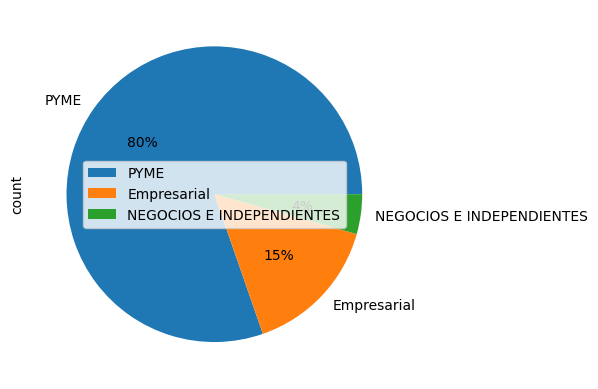

In [177]:
df = datos.groupby(["segmento"],as_index=True, sort=False).agg(count=("saldo_deuda","count"))
df.plot(kind='pie', y='count', autopct='%1.0f%%')
df

El 80% (1645) de los productos son del segmente PYME, 15% (314) Empresarial y 4% (89) NEGOCIOS E INDEPENDIENTES

¿Cómo se distribuyen los plazos de los préstamos entre los diferentes segmentos de clientes?

In [181]:
df = datos.groupby(["segmento"],as_index=True, sort=False).agg(mean=("plazo","mean"),
                                min=("plazo","min"), max=("plazo","max"),
                                median=("plazo","median"))
df


mean   min       max  median
segmento                                                     
PYME                       342.942073   0.0  400000.0    24.0
Empresarial                 49.993631   1.0     402.0    36.0
NEGOCIOS E INDEPENDIENTES   57.295455  12.0     240.0    51.5

El segmente PYME tiene en general el plazo más bajo en sus préstamos , seguido por Empresarial y terminado con NEGOCIOS E INDEPENDIENTES con los plazos mas altos en promedio.